<a href="https://colab.research.google.com/github/naoshin2111/Statistics-with-PYTHON-Solution/blob/main/Statistics_with_PYTHON_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A stock price always fluctuates, but is there a relation between a closing price and its moving averags?

An analyst wants to showcase how the stock would move, he has 5 years stock price date with him on which he needs to perform the analysis.

OBJECTIVE

Find the possible futuristic movement of the stock GOOG based on its price for the last 5 years.

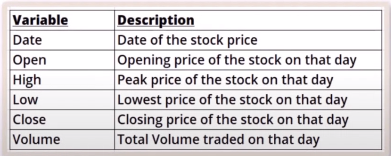

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import random
from datetime import datetime, timedelta

# Define the column names
columns = ["Date", "Drug1", "Drug2", "Drug3", "Drug4", "Drug5", "Drug6", "Drug7", "Drug8",
           "Drug1_Sales", "Drug2_Sales", "Drug3_Sales", "Drug4_Sales", "Drug5_Sales",
           "Drug6_Sales", "Drug7_Sales", "Drug8_Sales"]

# Generate data for each column
data = []
start_date = datetime(2023, 5, 1)
for _ in range(30):
    row = []
    row.append(start_date.strftime("%Y-%m-%d"))
    start_date += timedelta(days=1)
    for _ in range(8):
        row.append(random.uniform(0, 50))
    for _ in range(8):
        row.append(random.uniform(0, 30000))
    data.append(row)

# Write the data to a CSV file
filename = "pivot.csv"
with open(filename, "w", newline="") as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(columns)
    writer.writerows(data)

print(f"CSV file '{filename}' has been created successfully!")

CSV file 'pivot.csv' has been created successfully!


In [2]:
# Read the CSV file into a dataframe
df = pd.read_csv("pivot.csv")
df.head()

,Date,Drug1,Drug2,Drug3,Drug4,Drug5,Drug6,Drug7,Drug8,Drug1_Sales,Drug2_Sales,Drug3_Sales,Drug4_Sales,Drug5_Sales,Drug6_Sales,Drug7_Sales,Drug8_Sales
0,2023-05-01,0.398979,33.985439,18.101492,49.748173,5.861759,29.228795,49.406261,28.014403,29003.898301,28638.922205,22402.631483,16809.451358,20717.419325,7368.821763,20500.979705,3806.746537
1,2023-05-02,26.894335,41.938275,42.787485,14.268493,42.694270,29.008470,40.652780,40.990154,17679.706926,16917.540200,8173.576751,10695.340869,24197.989209,19899.377418,19495.537459,15510.343707
2,2023-05-03,38.638688,39.647742,19.929230,9.961256,21.267662,8.827735,14.813774,19.187847,16204.773872,16938.075804,19009.402560,17389.192348,11720.572548,15122.301429,24684.498467,934.082876
3,2023-05-04,6.609050,1.165956,24.458391,8.413822,29.544948,18.574884,22.373218,35.932172,9237.563198,19216.883153,29969.760508,3325.678002,27358.305047,23535.491014,28879.167435,2784.314405
4,2023-05-05,30.976898,2.980325,18.467174,24.636213,26.151760,6.419486,8.316720,7.664530,26246.982627,6620.302502,21892.312646,22833.829060,23670.754803,2713.430620,14494.081868,21138.385961


In [3]:
df.shape

(30, 17)

1. Get 5 years of data from Finance Package with Ticker Symbol 'GOOG'
2. Create 50DMA and 200DMA
3. Plot it with the Actual Price
4. Basic EDA on the Data
5. Fit Statsmodel OLS to find the best possible features


In [4]:
#Import libraries need for EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings('ignore')

In [5]:
df['Date']=pd.to_datetime(df['Date'])
df.set_index(['Date'], inplace = True)

In [6]:
df.head()

,Drug1,Drug2,Drug3,Drug4,Drug5,Drug6,Drug7,Drug8,Drug1_Sales,Drug2_Sales,Drug3_Sales,Drug4_Sales,Drug5_Sales,Drug6_Sales,Drug7_Sales,Drug8_Sales
Date,,,,,,,,,,,,,,,,
2023-05-01,0.398979,33.985439,18.101492,49.748173,5.861759,29.228795,49.406261,28.014403,29003.898301,28638.922205,22402.631483,16809.451358,20717.419325,7368.821763,20500.979705,3806.746537
2023-05-02,26.894335,41.938275,42.787485,14.268493,42.694270,29.008470,40.652780,40.990154,17679.706926,16917.540200,8173.576751,10695.340869,24197.989209,19899.377418,19495.537459,15510.343707
2023-05-03,38.638688,39.647742,19.929230,9.961256,21.267662,8.827735,14.813774,19.187847,16204.773872,16938.075804,19009.402560,17389.192348,11720.572548,15122.301429,24684.498467,934.082876
2023-05-04,6.609050,1.165956,24.458391,8.413822,29.544948,18.574884,22.373218,35.932172,9237.563198,19216.883153,29969.760508,3325.678002,27358.305047,23535.491014,28879.167435,2784.314405
2023-05-05,30.976898,2.980325,18.467174,24.636213,26.151760,6.419486,8.316720,7.664530,26246.982627,6620.302502,21892.312646,22833.829060,23670.754803,2713.430620,14494.081868,21138.385961


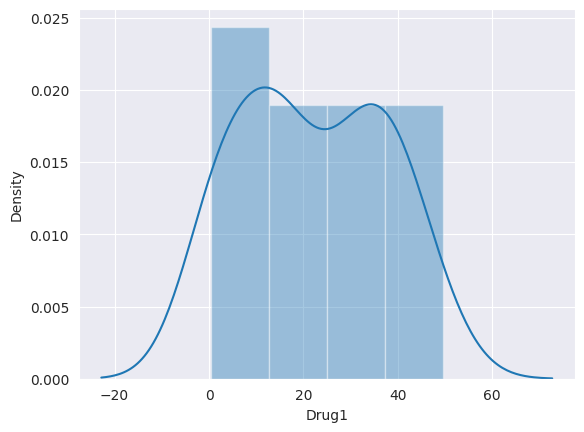

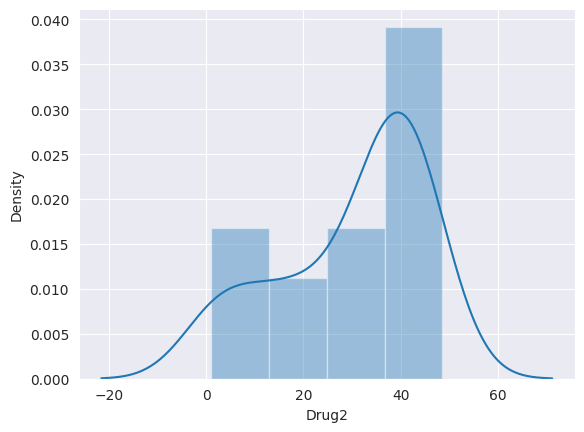

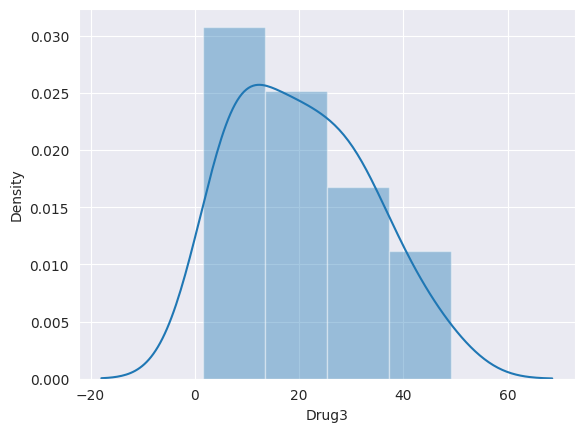

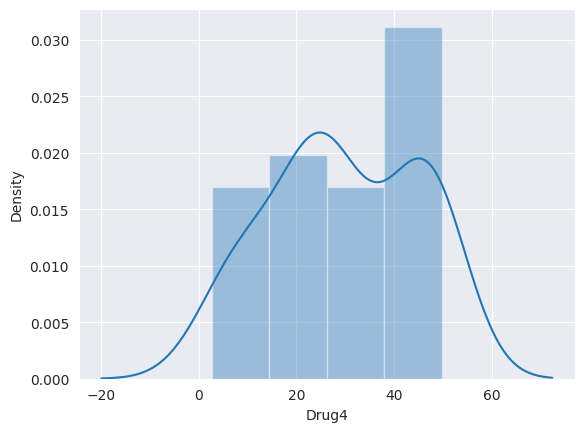

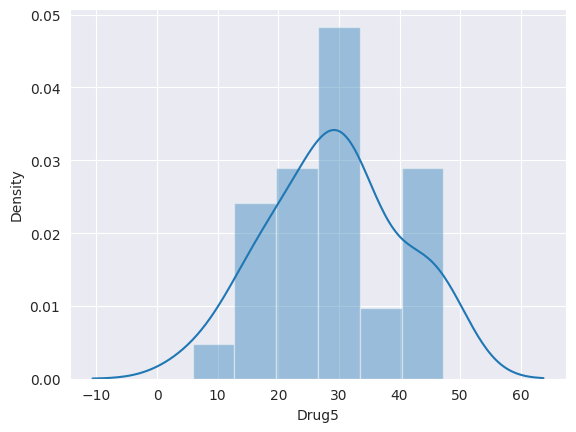

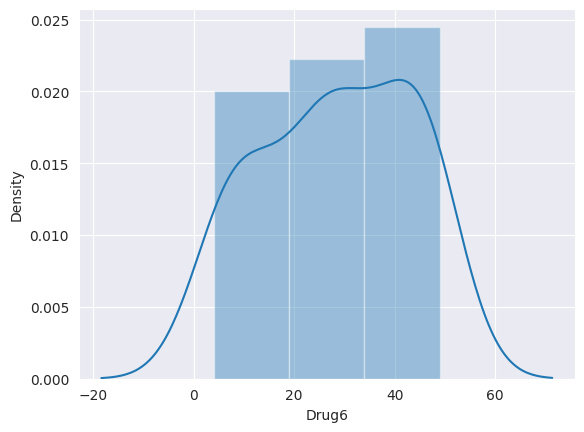

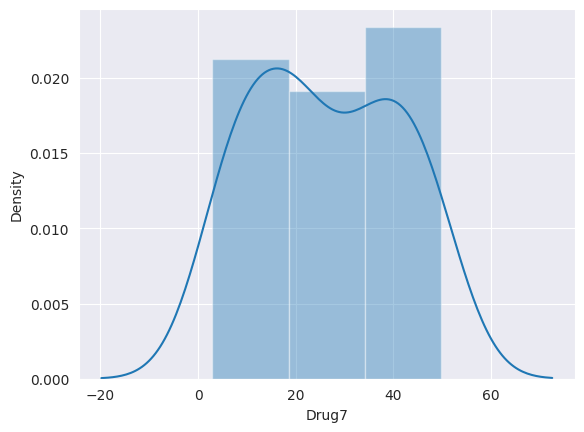

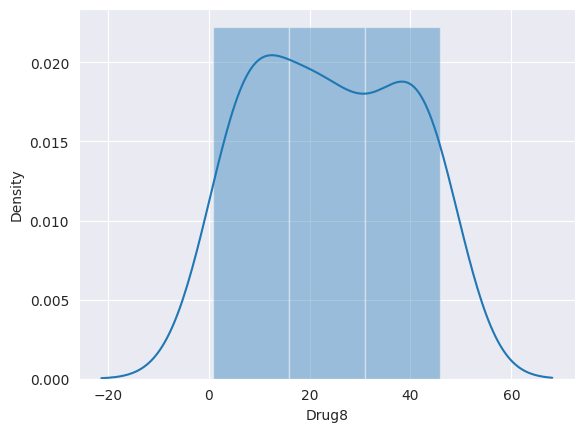

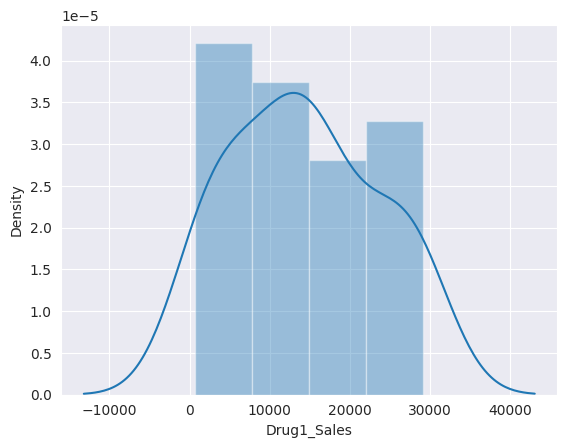

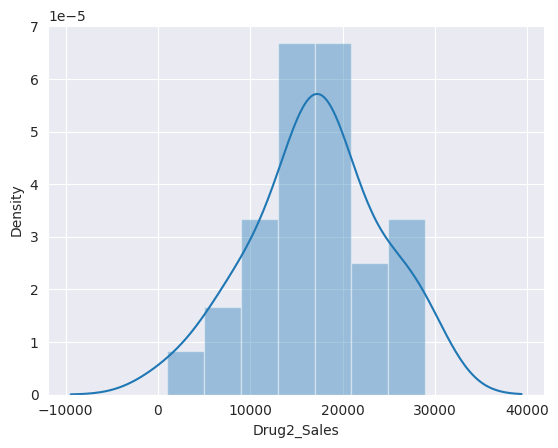

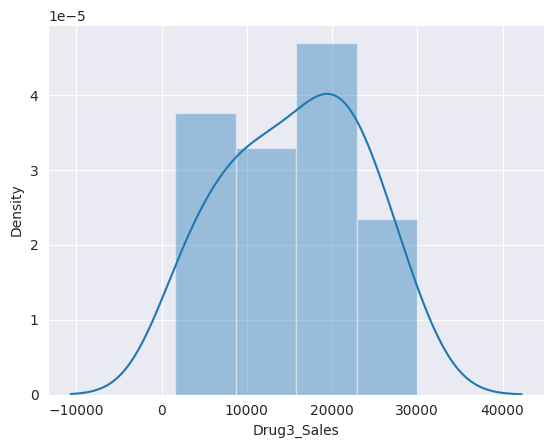

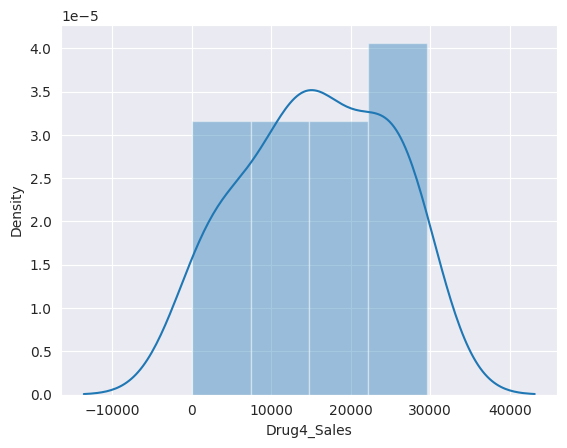

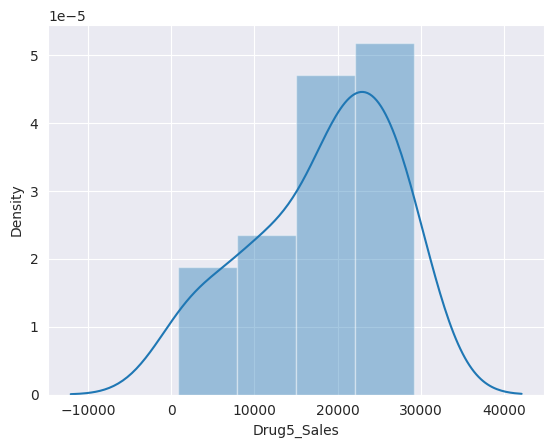

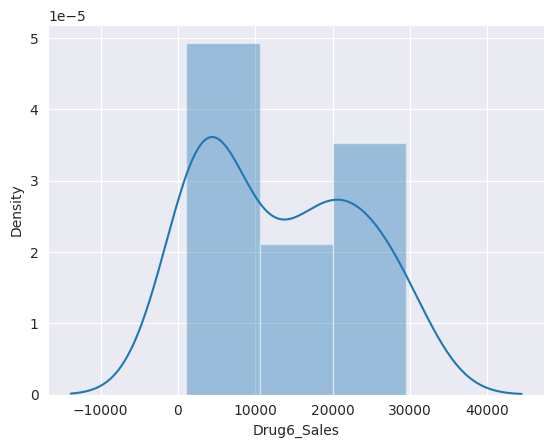

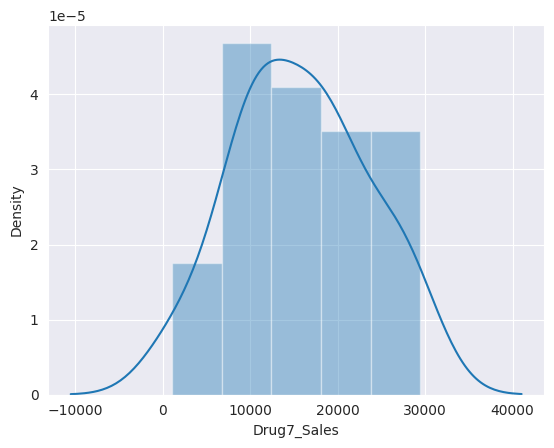

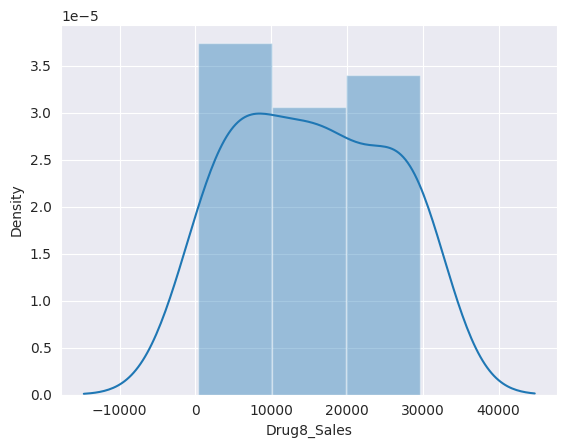

In [7]:
for col in df.columns:
  sns.distplot(df[col])
  plt.show()

In [8]:
#Describing the data
df.describe()

,Drug1,Drug2,Drug3,Drug4,Drug5,Drug6,Drug7,Drug8,Drug1_Sales,Drug2_Sales,Drug3_Sales,Drug4_Sales,Drug5_Sales,Drug6_Sales,Drug7_Sales,Drug8_Sales
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,22.086969,30.029029,20.546550,29.743897,29.275560,28.401652,26.212683,24.126508,14236.392944,17103.256453,15658.348009,15733.456932,18189.780628,13172.961994,15786.633758,15300.059850
std,15.224392,14.869290,12.779562,14.887187,10.860387,14.756393,14.957309,14.619139,9133.959776,6900.208667,8072.502791,8934.271472,8520.152840,9839.172814,7612.530986,9923.111657
min,0.327064,0.977857,1.482046,2.672551,5.861759,4.067066,2.898099,0.944423,684.773661,1029.719442,1604.029125,42.735307,879.922207,1091.353293,1038.293701,342.771133
25%,10.413634,19.816954,9.181079,21.897185,21.906754,16.240699,13.886018,9.597104,6808.282216,13605.873963,8832.856239,9662.670962,11786.233897,4376.934841,10334.782430,7303.974935
50%,18.505040,34.985453,18.910982,26.948674,29.787553,27.945292,22.671674,22.720275,13613.800783,17336.003934,16483.837157,16096.105779,20333.148588,13159.775100,15552.323366,15221.414455
75%,35.509375,41.110113,29.356689,45.340470,33.655398,42.390136,39.288819,38.621736,21226.018174,20343.014971,22234.904048,23826.786231,24883.821897,20865.461095,20145.960295,25500.576806
max,49.559658,48.606718,49.146284,49.748173,47.247276,48.948814,49.908702,45.885608,29146.538811,28920.197428,29969.760508,29548.833822,29178.335353,29458.381380,29458.461649,29697.274310


In [9]:
np.mean(df['Drug1_Sales']/df['Drug1'])

6735.4541209313165

In [10]:
drugs = ['Drug'+str(x) for x in range(1,9)]
for drug in drugs:
  print(drug, end = '-')
  print(np.mean(df[drug+'_Sales']/df[drug]))

Drug1-6735.4541209313165
Drug2-1825.7473168112613
Drug3-1204.0634731173227
Drug4-862.4545824213567
Drug5-776.1440623746905
Drug6-793.3031898447745
Drug7-895.8823633619202
Drug8-1209.3911109234696


Weekly Analysis

In [11]:
wdf = df.resample('W').mean()

In [12]:
wdf.head()

,Drug1,Drug2,Drug3,Drug4,Drug5,Drug6,Drug7,Drug8,Drug1_Sales,Drug2_Sales,Drug3_Sales,Drug4_Sales,Drug5_Sales,Drug6_Sales,Drug7_Sales,Drug8_Sales
Date,,,,,,,,,,,,,,,,
2023-05-07,19.460473,25.949754,23.127509,25.771372,26.416563,26.212251,27.732092,20.832639,17918.970085,19462.365734,19787.743447,12873.307848,22484.385799,10317.689431,22062.732711,11183.946334
2023-05-14,23.323982,28.160454,22.705693,31.542853,33.482982,32.798312,30.640632,31.531397,16573.918648,16887.959180,16077.762137,15418.432248,20007.833720,12921.215520,17608.959293,9895.785566
2023-05-21,19.021015,26.999713,19.087092,31.356449,31.911070,26.353450,36.215647,26.571701,13433.573012,18265.762127,16975.029879,16433.996872,11866.055889,12062.977848,14036.837536,18506.695511
2023-05-28,25.848335,37.590077,13.411887,31.669175,26.546421,27.410351,15.398146,23.310304,11135.458060,14863.934605,11754.247772,16636.317617,19026.615180,16784.857834,13506.441194,23312.694007
2023-06-04,24.516221,34.985453,34.035615,24.968982,24.883765,31.314513,8.237433,4.036477,6829.174841,13368.771026,8793.478815,21234.662928,15999.592357,15290.837689,1547.108804,9353.972789


In [13]:
wdf.tail()

,Drug1,Drug2,Drug3,Drug4,Drug5,Drug6,Drug7,Drug8,Drug1_Sales,Drug2_Sales,Drug3_Sales,Drug4_Sales,Drug5_Sales,Drug6_Sales,Drug7_Sales,Drug8_Sales
Date,,,,,,,,,,,,,,,,
2023-05-07,19.460473,25.949754,23.127509,25.771372,26.416563,26.212251,27.732092,20.832639,17918.970085,19462.365734,19787.743447,12873.307848,22484.385799,10317.689431,22062.732711,11183.946334
2023-05-14,23.323982,28.160454,22.705693,31.542853,33.482982,32.798312,30.640632,31.531397,16573.918648,16887.959180,16077.762137,15418.432248,20007.833720,12921.215520,17608.959293,9895.785566
2023-05-21,19.021015,26.999713,19.087092,31.356449,31.911070,26.353450,36.215647,26.571701,13433.573012,18265.762127,16975.029879,16433.996872,11866.055889,12062.977848,14036.837536,18506.695511
2023-05-28,25.848335,37.590077,13.411887,31.669175,26.546421,27.410351,15.398146,23.310304,11135.458060,14863.934605,11754.247772,16636.317617,19026.615180,16784.857834,13506.441194,23312.694007
2023-06-04,24.516221,34.985453,34.035615,24.968982,24.883765,31.314513,8.237433,4.036477,6829.174841,13368.771026,8793.478815,21234.662928,15999.592357,15290.837689,1547.108804,9353.972789


In [14]:
wdf.describe()

,Drug1,Drug2,Drug3,Drug4,Drug5,Drug6,Drug7,Drug8,Drug1_Sales,Drug2_Sales,Drug3_Sales,Drug4_Sales,Drug5_Sales,Drug6_Sales,Drug7_Sales,Drug8_Sales
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,22.434005,30.737090,22.473559,29.061766,28.648160,28.817775,23.644790,21.256504,13178.218929,16569.758534,14677.652410,16519.343502,17876.896589,13475.515664,13752.415908,14450.618841
std,3.052692,5.209070,7.545607,3.383693,3.794407,3.038127,11.500740,10.425352,4431.532935,2474.924875,4373.816253,3031.533682,4084.916762,2574.952325,7632.909226,6172.146924
min,19.021015,25.949754,13.411887,24.968982,24.883765,26.212251,8.237433,4.036477,6829.174841,13368.771026,8793.478815,12873.307848,11866.055889,10317.689431,1547.108804,9353.972789
25%,19.460473,26.999713,19.087092,25.771372,26.416563,26.353450,15.398146,20.832639,11135.458060,14863.934605,11754.247772,15418.432248,15999.592357,12062.977848,13506.441194,9895.785566
50%,23.323982,28.160454,22.705693,31.356449,26.546421,27.410351,27.732092,23.310304,13433.573012,16887.959180,16077.762137,16433.996872,19026.615180,12921.215520,14036.837536,11183.946334
75%,24.516221,34.985453,23.127509,31.542853,31.911070,31.314513,30.640632,26.571701,16573.918648,18265.762127,16975.029879,16636.317617,20007.833720,15290.837689,17608.959293,18506.695511
max,25.848335,37.590077,34.035615,31.669175,33.482982,32.798312,36.215647,31.531397,17918.970085,19462.365734,19787.743447,21234.662928,22484.385799,16784.857834,22062.732711,23312.694007


<BarContainer object of 5 artists>

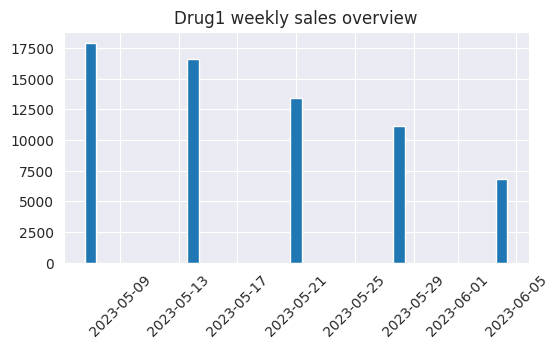

In [15]:
#Drug1 weekly sales overview
plt.figure(figsize =(6,3), dpi = 100)
plt.tick_params(axis = 'x', rotation = 45)
plt.title('Drug1 weekly sales overview')
plt.bar(x = wdf.index, height = wdf.Drug1_Sales)

<BarContainer object of 5 artists>

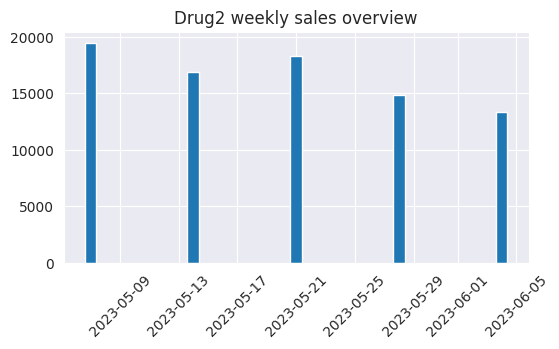

In [16]:
#Drug2 weekly sales overview
plt.figure(figsize =(6,3), dpi = 100)
plt.tick_params(axis = 'x', rotation = 45)
plt.title('Drug2 weekly sales overview')
plt.bar(x = wdf.index, height = wdf.Drug2_Sales)

<BarContainer object of 5 artists>

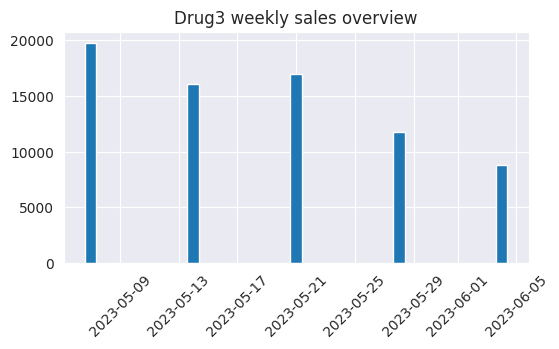

In [17]:
#Drug3 weekly sales overview
plt.figure(figsize =(6,3), dpi = 100)
plt.tick_params(axis = 'x', rotation = 45)
plt.title('Drug3 weekly sales overview')
plt.bar(x = wdf.index, height = wdf.Drug3_Sales)

<BarContainer object of 5 artists>

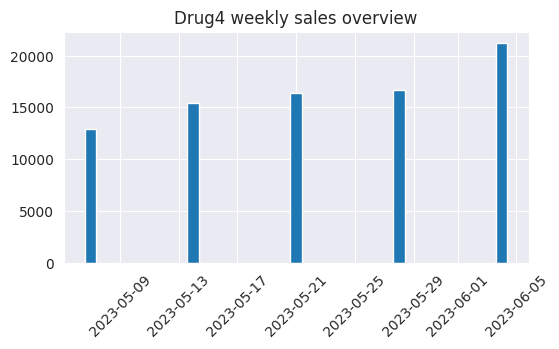

In [18]:
#Drug4 weekly sales overview
plt.figure(figsize =(6,3), dpi = 100)
plt.tick_params(axis = 'x', rotation = 45)
plt.title('Drug4 weekly sales overview')
plt.bar(x = wdf.index, height = wdf.Drug4_Sales)

<BarContainer object of 5 artists>

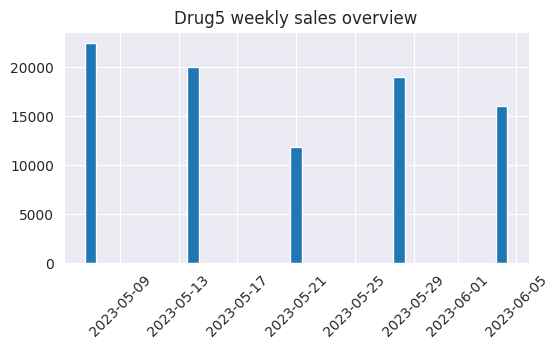

In [19]:
#Drug5 weekly sales overview
plt.figure(figsize =(6,3), dpi = 100)
plt.tick_params(axis = 'x', rotation = 45)
plt.title('Drug5 weekly sales overview')
plt.bar(x = wdf.index, height = wdf.Drug5_Sales)

<BarContainer object of 5 artists>

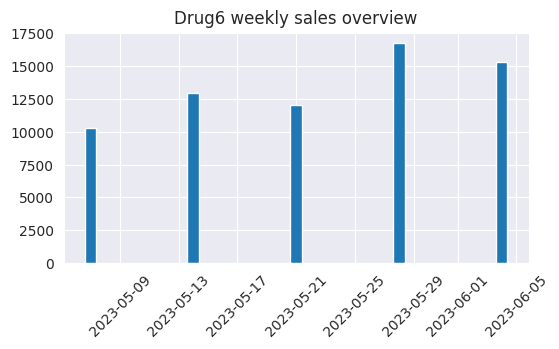

In [20]:
#Drug6 weekly sales overview
plt.figure(figsize =(6,3), dpi = 100)
plt.tick_params(axis = 'x', rotation = 45)
plt.title('Drug6 weekly sales overview')
plt.bar(x = wdf.index, height = wdf.Drug6_Sales)

<BarContainer object of 5 artists>

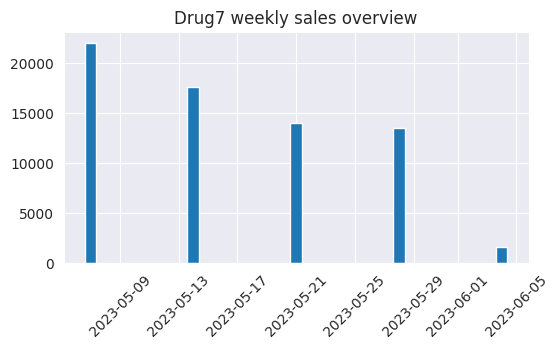

In [21]:
#Drug7 weekly sales overview
plt.figure(figsize =(6,3), dpi = 100)
plt.tick_params(axis = 'x', rotation = 45)
plt.title('Drug7 weekly sales overview')
plt.bar(x = wdf.index, height = wdf.Drug7_Sales)

<BarContainer object of 5 artists>

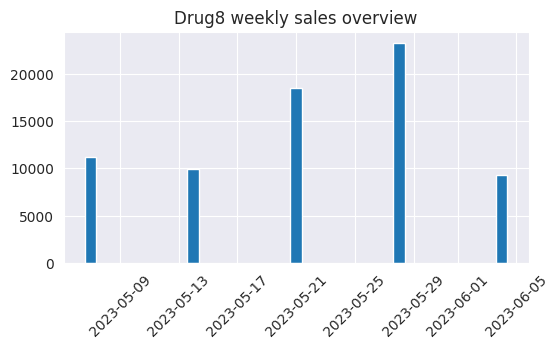

In [22]:
#Drug8 weekly sales overview
plt.figure(figsize =(6,3), dpi = 100)
plt.tick_params(axis = 'x', rotation = 45)
plt.title('Drug8 weekly sales overview')
plt.bar(x = wdf.index, height = wdf.Drug8_Sales)

Monthly Analysis

In [23]:
mdf = df.resample('M').mean()

In [24]:
mdf.head()

,Drug1,Drug2,Drug3,Drug4,Drug5,Drug6,Drug7,Drug8,Drug1_Sales,Drug2_Sales,Drug3_Sales,Drug4_Sales,Drug5_Sales,Drug6_Sales,Drug7_Sales,Drug8_Sales
Date,,,,,,,,,,,,,,,,
2023-05-31,22.086969,30.029029,20.54655,29.743897,29.27556,28.401652,26.212683,24.126508,14236.392944,17103.256453,15658.348009,15733.456932,18189.780628,13172.961994,15786.633758,15300.05985


<BarContainer object of 1 artists>

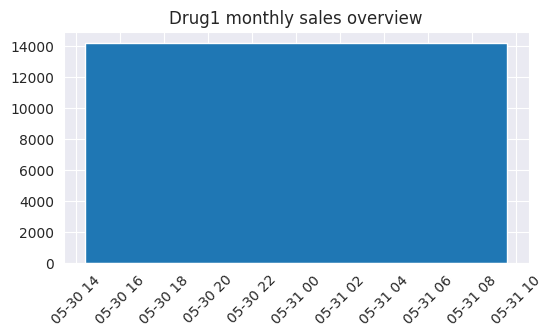

In [25]:
#Drug1 monthly sales overview
plt.figure(figsize =(6,3), dpi = 100)
plt.tick_params(axis = 'x', rotation = 45)
plt.title('Drug1 monthly sales overview')
plt.bar(x = mdf.index, height = mdf.Drug1_Sales)

<BarContainer object of 1 artists>

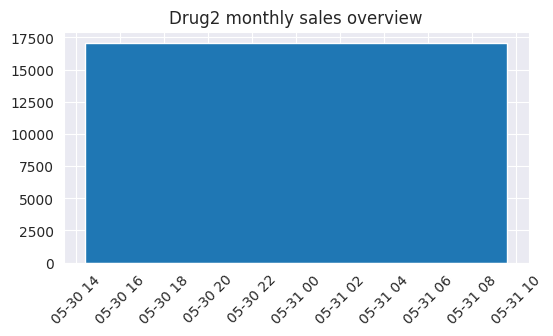

In [26]:
#Drug2 monthly sales overview
plt.figure(figsize =(6,3), dpi = 100)
plt.tick_params(axis = 'x', rotation = 45)
plt.title('Drug2 monthly sales overview')
plt.bar(x = mdf.index, height = mdf.Drug2_Sales)